In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
import os

# Input Preparation 

In [13]:
pd.options.mode.copy_on_write = True
BUST_TEST_COLUMNS = [
    # accuracy #
    "rmsd_≤_2å",
    # chemical validity and consistency #
    "mol_pred_loaded",
    "mol_true_loaded",
    "mol_cond_loaded",
    "sanitization",
    "molecular_formula",
    "molecular_bonds",
    "tetrahedral_chirality",
    "double_bond_stereochemistry",
    # intramolecular validity #
    "bond_lengths",
    "bond_angles",
    "internal_steric_clash",
    "aromatic_ring_flatness",
    "double_bond_flatness",
    "internal_energy",
    # intermolecular validity #
    "minimum_distance_to_protein",
    "minimum_distance_to_organic_cofactors",
    "minimum_distance_to_inorganic_cofactors",
    "volume_overlap_with_protein",
    "volume_overlap_with_organic_cofactors",
    "volume_overlap_with_inorganic_cofactors",
]

In [14]:
# Calculate the reduction in the number of molecules for each filter property
filter_columns = [
    'rmsd_≤_2å', 'mol_pred_loaded', 'mol_true_loaded', 'mol_cond_loaded',
    'sanitization', 'molecular_formula', 'molecular_bonds',
    'tetrahedral_chirality', 'double_bond_stereochemistry', 'bond_lengths',
    'bond_angles', 'internal_steric_clash', 'aromatic_ring_flatness',
    'double_bond_flatness', 'internal_energy',
    'minimum_distance_to_protein', 'minimum_distance_to_organic_cofactors',
    'minimum_distance_to_inorganic_cofactors', 'volume_overlap_with_protein',
    'volume_overlap_with_organic_cofactors', 'volume_overlap_with_inorganic_cofactors'
]

In [7]:
globals()['diffdock_output_dir']  = os.path.join("..", "forks", "DiffDock", "inference")
globals()["dynamicbind_output_dir"] = os.path.join(
    "..", "forks", "DynamicBind", "inference", "outputs", "results"
)

repeat_index = 0
max_num_repeats_per_method = 1

for repeat_index in range(0, max_num_repeats_per_method):
    globals()[f"diffdock_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()['diffdock_output_dir'], 
        f"diffdock_astex_diverse_output_{repeat_index}.csv", 
        "bust_results.csv")
    globals()[f"dynamicbind_astex_bust_results_csv_filepath_{repeat_index}"] = os.path.join(
        globals()["dynamicbind_output_dir"],
        "bust_results.csv")
        

## astex

In [16]:
astex_diffdock_bust_results_csv_filepath_ = os.path.join(globals()["diffdock_output_dir"], "diffdock_astex_diverse_output_orig_structure_1", "bust_results.csv")
# dynamicbind_astex_bust_results_csv_filepath_ = os.path.join(globals()["dynamicbind_output_dir"], "bust_results.csv")
astex_diffdock_results_df = pd.read_csv(astex_diffdock_bust_results_csv_filepath_)

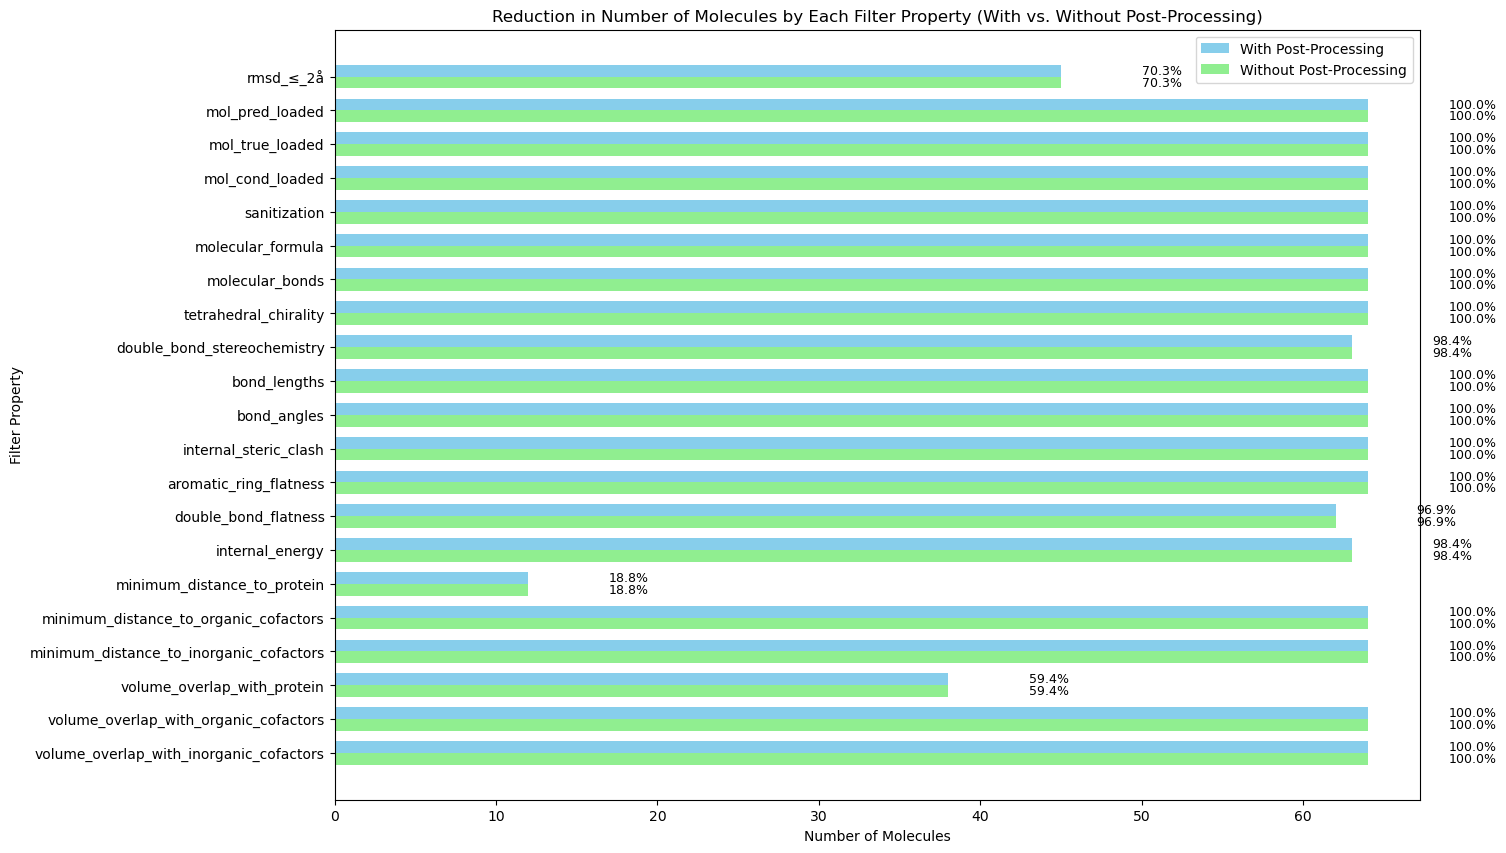

In [17]:
# Assuming astex_diffdock_results_df and filter_columns are already defined
molecules_passing_with_post_processing = [astex_diffdock_results_df[col].sum() for col in filter_columns]
molecules_passing_without_post_processing = [astex_diffdock_results_df[col].sum() for col in filter_columns]

# Calculating proportions
total_molecules = astex_diffdock_results_df.shape[0]
proportions_with_post_processing = [value / total_molecules for value in molecules_passing_with_post_processing]
proportions_without_post_processing = [value / total_molecules for value in molecules_passing_without_post_processing]

# Plotting the reduction of molecules for each filter, comparing with and without post-processing
plt.figure(figsize=(14, 10))
bar_width = 0.35
index = range(len(filter_columns))

# Creating bar plots for each subset
bars_with = plt.barh(index, molecules_passing_with_post_processing, bar_width, label='With Post-Processing', color='skyblue')
bars_without = plt.barh([i + bar_width for i in index], molecules_passing_without_post_processing, bar_width, label='Without Post-Processing', color='lightgreen')

# Adding labels and title
plt.xlabel('Number of Molecules')
plt.ylabel('Filter Property')
plt.title('Reduction in Number of Molecules by Each Filter Property (With vs. Without Post-Processing)')
plt.yticks([i + bar_width / 2 for i in index], filter_columns)
plt.gca().invert_yaxis()  # To have the first filter at the top
plt.legend()

# Adding proportional annotations to the bars
for bar, proportion in zip(bars_with, proportions_with_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

for bar, proportion in zip(bars_without, proportions_without_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

# Display the plot
plt.show()

# Posebuster

In [23]:
pb_diffdock_bust_results_csv_filepath_ = os.path.join(globals()["diffdock_output_dir"], "diffdock_posebusters_benchmark_output_orig_structure_1", "bust_results.csv")
# dynamicbind_astex_bust_results_csv_filepath_ = os.path.join(globals()["dynamicbind_output_dir"], "bust_results.csv")
pb_diffdock_results_df = pd.read_csv(pb_diffdock_bust_results_csv_filepath_)
pb_diffdock_results_df

,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,most_extreme_sum_radii_scaled_waters,most_extreme_relative_distance_waters,most_extreme_clash_waters,volume_overlap_protein,volume_overlap_organic_cofactors,volume_overlap_inorganic_cofactors,volume_overlap_waters,rmsd,kabsch_rmsd,centroid_distance
0,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.080808,NaN,NaN,NaN,21.896085,0.781572,21.850180
1,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.103761,NaN,NaN,NaN,5.740301,1.373532,0.546430
2,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.075277,NaN,NaN,NaN,5.971984,2.305808,3.259690
3,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.012922,NaN,NaN,NaN,4.915704,0.741470,1.540657
4,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.289556,NaN,NaN,NaN,35.789120,1.147079,35.659426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.039163,NaN,NaN,NaN,50.869790,0.653058,50.109740
204,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.028883,NaN,NaN,NaN,2.439962,0.169825,1.859504
205,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,0.046712,NaN,NaN,NaN,2.206303,2.074130,0.322661
206,True,True,True,True,True,True,True,True,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.396023,0.963193,80.238583


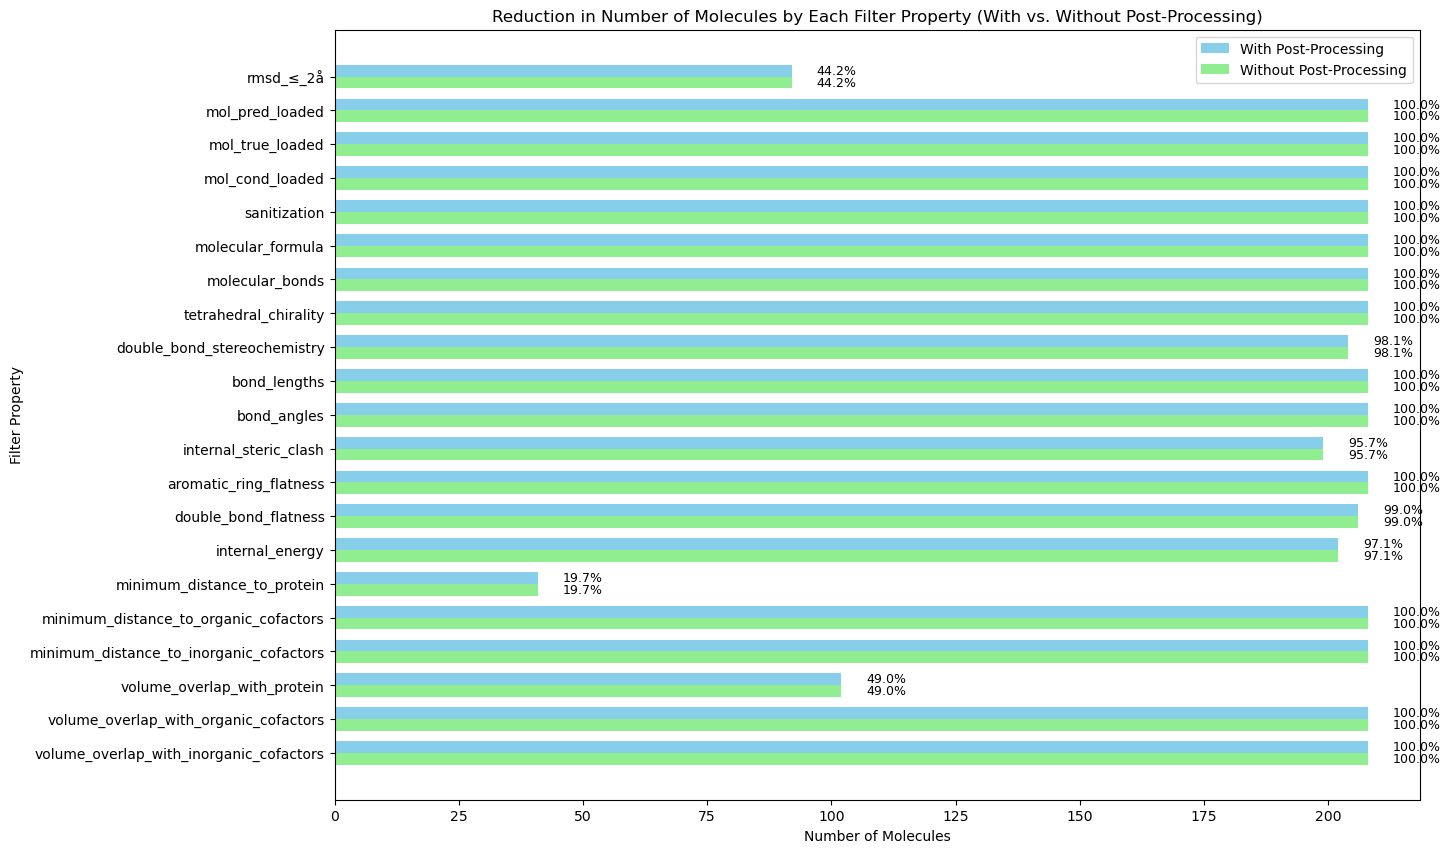

In [25]:
# Assuming astex_diffdock_results_df and filter_columns are already defined
molecules_passing_with_post_processing = [pb_diffdock_results_df[col].sum() for col in filter_columns]
molecules_passing_without_post_processing = [pb_diffdock_results_df[col].sum() for col in filter_columns]

# Calculating proportions
total_molecules = pb_diffdock_results_df.shape[0]
proportions_with_post_processing = [value / total_molecules for value in molecules_passing_with_post_processing]
proportions_without_post_processing = [value / total_molecules for value in molecules_passing_without_post_processing]

# Plotting the reduction of molecules for each filter, comparing with and without post-processing
plt.figure(figsize=(14, 10))
bar_width = 0.35
index = range(len(filter_columns))

# Creating bar plots for each subset
bars_with = plt.barh(index, molecules_passing_with_post_processing, bar_width, label='With Post-Processing', color='skyblue')
bars_without = plt.barh([i + bar_width for i in index], molecules_passing_without_post_processing, bar_width, label='Without Post-Processing', color='lightgreen')

# Adding labels and title
plt.xlabel('Number of Molecules')
plt.ylabel('Filter Property')
plt.title('Reduction in Number of Molecules by Each Filter Property (With vs. Without Post-Processing)')
plt.yticks([i + bar_width / 2 for i in index], filter_columns)
plt.gca().invert_yaxis()  # To have the first filter at the top
plt.legend()

# Adding proportional annotations to the bars
for bar, proportion in zip(bars_with, proportions_with_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

for bar, proportion in zip(bars_without, proportions_without_post_processing):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2,
             f'{proportion:.1%}', va='center', fontsize=9, color='black')

# Display the plot
plt.show()